In [89]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
%matplotlib inline

In [90]:
src_path = "Data/1"
sub_class = os.listdir(src_path)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


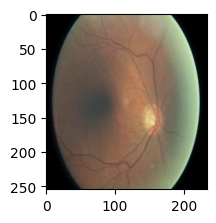

In [91]:
fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:1])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    print(img)

In [92]:
def append_ext(fn):
    return fn+".jpeg"

In [93]:
train_labels = pd.read_csv("trainLabels.csv",dtype=str)
train_labels['level'] = train_labels['level'].astype(str)
train_labels["image"]=train_labels["image"].apply(append_ext)
train_labels.head()

,image,level
0,10_left.jpeg,0
1,10_right.jpeg,0
2,13_left.jpeg,0
3,13_right.jpeg,0
4,15_left.jpeg,1


In [94]:
batch_size =4
input_shape = (256,256,3)
input_size = (256,256)
epochs = 10
n_classes = 5

In [95]:
src_path_train = "data/1/"
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

In [96]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=src_path_train,
    x_col="image",
    y_col="level",
    target_size=input_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)

valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_labels,
    directory=src_path_train,
    x_col="image",
    y_col="level",
    target_size=input_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)

Found 3764 validated image filenames belonging to 5 classes.


C:\Users\Aayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 30409 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


Found 941 validated image filenames belonging to 5 classes.


C:\Users\Aayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 30409 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


In [97]:
train_generator

In [98]:
# Giving labels name for plot title

def give_label_name(label):
    for i in range(len(label)):
        if label[i] == 1:
            if i == 0:
                return "No DR"
            elif i == 1:
                return "Mild DR"
            elif i == 2:
                return "MODERATE DR"
            elif i == 3:
                return "NPDR"
            else:
                return "PDR"
        

In [99]:
# data frame iterator returns tuples of x & y

# x,y = train_generator[0]
# # x[0].shape
# fig = plt.figure(figsize=(10,10))
# for i in range(12):
#     label = give_label_name(y[i])
#     ax = plt.subplot(3,4,i+1)
#     plt.imshow(x[i])
#     plt.title(label)
#     plt.axis("off")

In [100]:
# test split from training dataset
#test_ds = train_generator.take()

In [101]:
from tensorflow.keras import models,layers
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [114]:
def prepare_model():
    model = Sequential()
    data_augmentation,
    
    model.add(Conv2D(256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.5))
    
    model.add(Conv2D(128,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64,kernel_size=(3,3),strides=(1, 1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.5))
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    
    model.add(Dropout(rate=0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    return model

In [115]:
model = prepare_model()

In [116]:
model.build(input_shape)

In [117]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 256, 256, 256)     7168      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 128, 128, 256)    0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 256)     590080    
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 64, 64, 256)      0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 64, 64, 256)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 128)     

In [118]:
# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=10)

Epoch 1/10
941/941 [==============================] - 4222s 4s/step - loss: 0.9493 - accuracy: 0.7272 - val_loss: 0.8776 - val_accuracy: 0.7426
Epoch 2/10
941/941 [==============================] - 27653s 29s/step - loss: 0.8942 - accuracy: 0.7298 - val_loss: 0.8894 - val_accuracy: 0.7415
Epoch 3/10
 10/941 [..............................] - ETA: 34:55 - loss: 0.9320 - accuracy: 0.7250

In [ ]:
scores = model.evaluate(test_ds,test_label)